 # Sujetadores de mercadillo

Este miniproyecto parte de la idea de que mi imaginario primo Richard, tiene una furgoneta con la recorre los pueblos vendiendo lenceria en mercadilos. Las mejores ofertas SEnyora!!! Mi primo imaginario tiene más imaginación que yo y me comenta que conoce a un tipo que conoce a otro que tiene un primo en Turquia y que puede pedir encargos de sujetadores al por mayor a unos precios de escandalo...

![](images/masaun.jpg)

... le miro a los ojos y veo el brillo de la ilusion por un negocio que cree puede hacerle de oro. 

>>Le digo: Primo! A cuánto puedes conseguir cada sujetador puesto ya en el maletero de tu furgo?.

>>Me dice: A dosmil pesetas, primo!.

>>Le digo: Dejame que mire en internet como se esta tu sector y vemos como puede salir el negocio.    

In [1]:
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager

In [119]:
import urllib.request

In [3]:
opciones=Options()
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.headless=False    # si True, no aperece la ventana (headless=no visible)
opciones.add_argument('--start-maximized')         # comienza maximizado
#opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies
#opciones.add_extension('driver_folder/adblock.crx')       # adblocker
opciones.add_argument('--incognito')              # incognito

In [4]:
precio = []
producto = []
photo = []
driver = "./chromedriver.exe"
driver = webdriver.Chrome(driver,  options = opciones)
url = 'https://www.intimissimi.com/es/'
driver.get(url)
driver.implicitly_wait(4) 
driver.find_element_by_css_selector("#cc-approve-button-thissite").click()


driver.get(f"https://www.intimissimi.com/es/mujer/sujetadores/?start={0*24}&sz=24")
#lista.append(driver.find_element_by_css_selector(f"#product-search-results > div:nth-child(2) > div:nth-child(2) > div > div:nth-child{0+1} > div > a").text)

lis_dic = []
for j in range(20):
    driver.get(f"https://www.intimissimi.com/es/mujer/sujetadores/?start={j*24}&sz=24")
    for i in range(1,25):
            try:
                dic = {}
                dic['producto'] = driver.find_element_by_css_selector(f"#product-search-results > div:nth-child(2) > div:nth-child(2) > div > div:nth-child({i}) > div > a > div.tile-body > div.product-tile__name > div > span").text
                dic['precio'] = driver.find_element_by_css_selector(f"#product-search-results > div:nth-child(2) > div:nth-child(2) > div > div:nth-child({i}) > div > a > div.tile-body > div.price-container > div > span > span > span.value.dark").text
                dic['color'] = driver.find_element_by_css_selector(f"#product-search-results > div:nth-child(2) > div:nth-child(2) > div > div:nth-child({i}) > div > a > div.tile-body > div.tile-colors > div.cell.color-swatches > div > span.small.light.text-darkish-gray.plp-swatch").text
                dic['photo'] = driver.find_element_by_css_selector(f'#product-search-results > div:nth-child(2) > div:nth-child(2) > div > div:nth-child({i}) > div > a > div.image-container > section > div > div > img.tile-image.tile-image-carousel.slick-slide.slick-current.slick-active').get_attribute("src")
                lis_dic.append(dic)
            except:
                dic1 = {}
                dic1['producto'] = 'nada'
                dic1['precio'] = 'nada'
                dic1['color'] = 'nada'
                dic1['photo'] = 'nada'
                lis_dic.append(dic1)

#product-search-results > div:nth-child(2) > div:nth-child(2) > div > div:nth-child(1) > div > a > div.tile-body > div.tile-colors > div.cell.color-swatches > div > span.small.light.text-darkish-gray.plp-swatch

/tmp/ipykernel_156/2474177659.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver,  options = opciones)
/tmp/ipykernel_156/2474177659.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#cc-approve-button-thissite").click()
/tmp/ipykernel_156/2474177659.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  dic['producto'] = driver.find_element_by_css_selector(f"#product-search-results > div:nth-child(2) > div:nth-child(2) > div > div:nth-child({i}) > div > a > div.tile-body > div.product-tile__name > div > span").text
/tmp/ipykernel_156/2474177659.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  dic['precio'] = driver.find_element_by_css_selector(f"#product-search-results > div:nth-child(2) > div:nth-child(2) > di

MaxRetryError: HTTPConnectionPool(host='localhost', port=64398): Max retries exceeded with url: /session/abff6d5ecea02d4ca34738c6b8f63585/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f54f2a6ed00>: Failed to establish a new connection: [Errno 111] Connection refused'))

![](images/bragas.jpg)

In [6]:
len(lis_dic)

432

In [7]:
df = pd.DataFrame(lis_dic)

In [44]:
df = df[df['producto']!='nada']


In [11]:
len(df)

374

In [12]:
#df.to_csv('sujetate.csv', index=False)

In [79]:
df = pd.read_csv('sujetate.csv')

In [80]:
df

,producto,precio,color,photo
0,Sujetador Balconette Elena de Encaje,"€ 29,90",4 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...
1,Sujetador Triangular Sexy Dot Com,"€ 29,90",2 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...
2,Sujetador Balconette Sexy Dot Com,"€ 29,90",NaN,https://www.intimissimi.com/dw/image/v2/BHHR_P...
3,Sujetador Carioca Silhouette D'Amour,"€ 29,90",2 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...
4,Sujetador Super Push-Up Gioia Forever Macramè,"€ 35,90",2 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...
...,...,...,...,...
369,Sujetador Balconette Giorgia Pretty Flowers,"€ 39,90",3 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...
370,Sujetador Laura Banda en Microfibra,"€ 29,90",5 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...
371,Sujetador Triangular Lara de Microfibra Ultral...,"€ 27,90",4 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...
372,Sujetador Push-Up Sweet en Microfibra Bellissima,"€ 19,90",5 Colores,https://www.intimissimi.com/dw/image/v2/BHHR_P...


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   producto  374 non-null    object
 1   precio    374 non-null    object
 2   color     324 non-null    object
 3   photo     374 non-null    object
dtypes: object(4)
memory usage: 11.8+ KB


In [82]:
df['precio'] = df['precio'].str.replace('€ ', '')

In [83]:
df['precio'] = df['precio'].str.replace(',', '.')

In [84]:
df['precio'] = df['precio'].apply(lambda x: float(x))

In [85]:
df['color'] = df['color'].fillna('0 Colores')

In [86]:
df['color'] = df['color'].apply(lambda x: int(x.split()[0]))

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   producto  374 non-null    object 
 1   precio    374 non-null    float64
 2   color     374 non-null    int64  
 3   photo     374 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.8+ KB


/home/fer/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


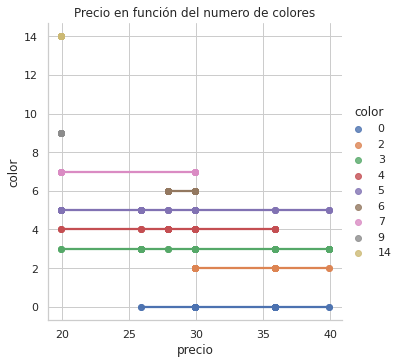

In [109]:
sns.lmplot('precio', 'color', hue="color", data=df)
plt.title('Precio en función del numero de colores')
plt.savefig('fig1.png', dpi = 300)

/home/fer/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


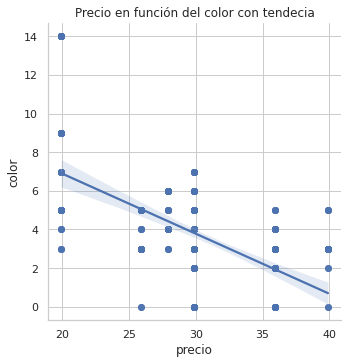

In [110]:
sns.lmplot('precio', 'color', data=df, fit_reg=True)
plt.title('Precio en función del color con tendecia')
plt.savefig('fig2.png', dpi = 300)

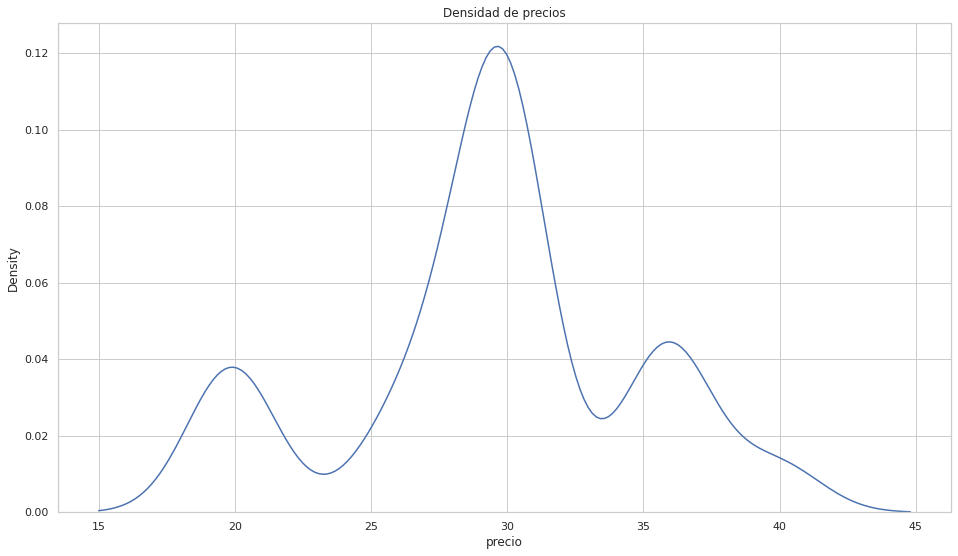

In [111]:
sns.kdeplot(df.precio)
plt.title('Densidad de precios')
plt.savefig('fig3.png', dpi = 300)

/home/fer/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


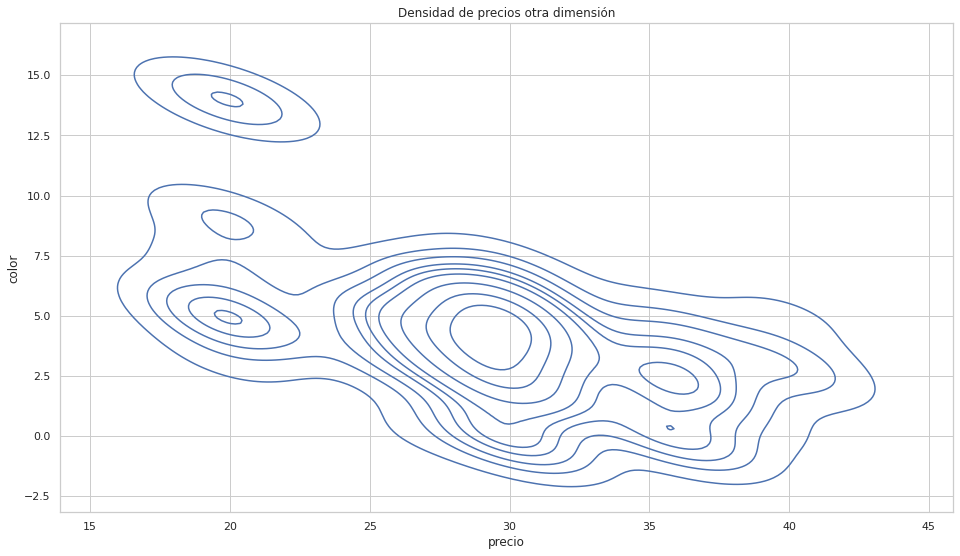

In [112]:
sns.kdeplot(df.precio, df.color)
plt.title('Densidad de precios otra dimensión')
plt.savefig('fig4.png', dpi = 300)

/home/fer/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


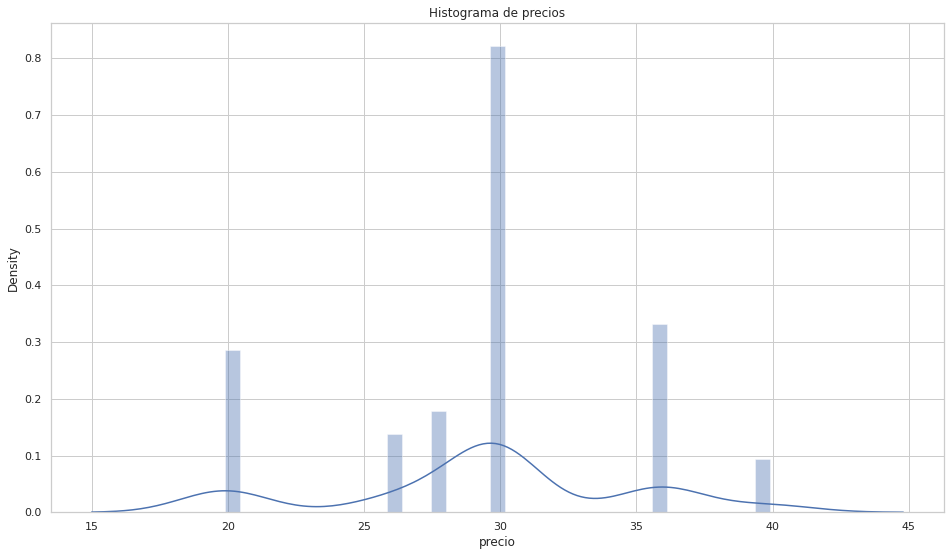

In [113]:
sns.distplot(df.precio)
plt.title('Histograma de precios')
plt.savefig('fig5.png', dpi = 300)

/home/fer/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


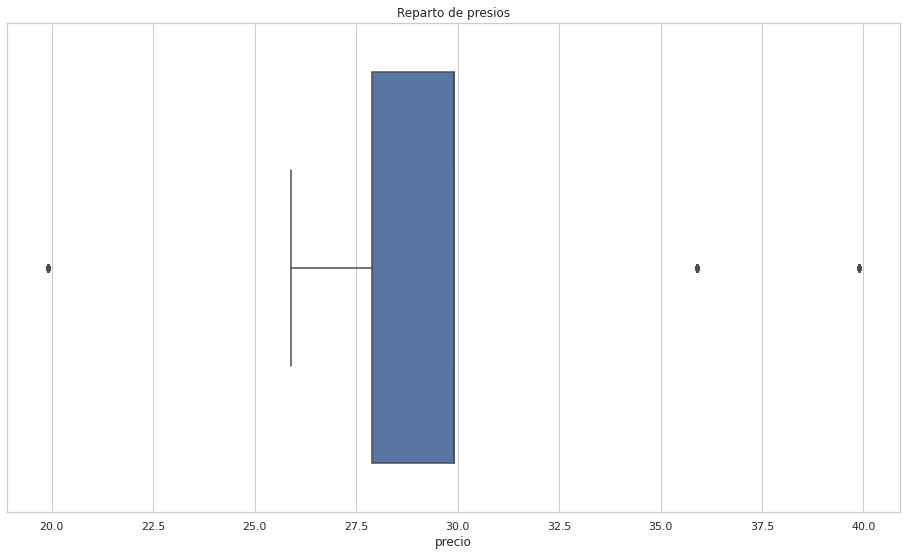

In [114]:
sns.boxplot(df.precio)
plt.title('Reparto de presios')
plt.savefig('fig6.png', dpi = 300)


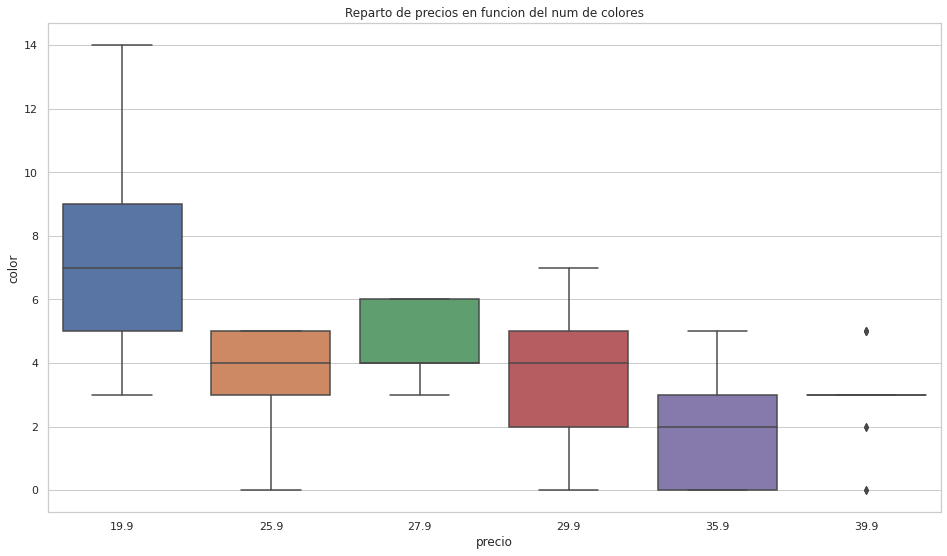

In [115]:
sns.boxplot(x=df.precio, y=df.color)
plt.title('Reparto de precios en funcion del num de colores')
plt.savefig('fig7.png', dpi = 300)

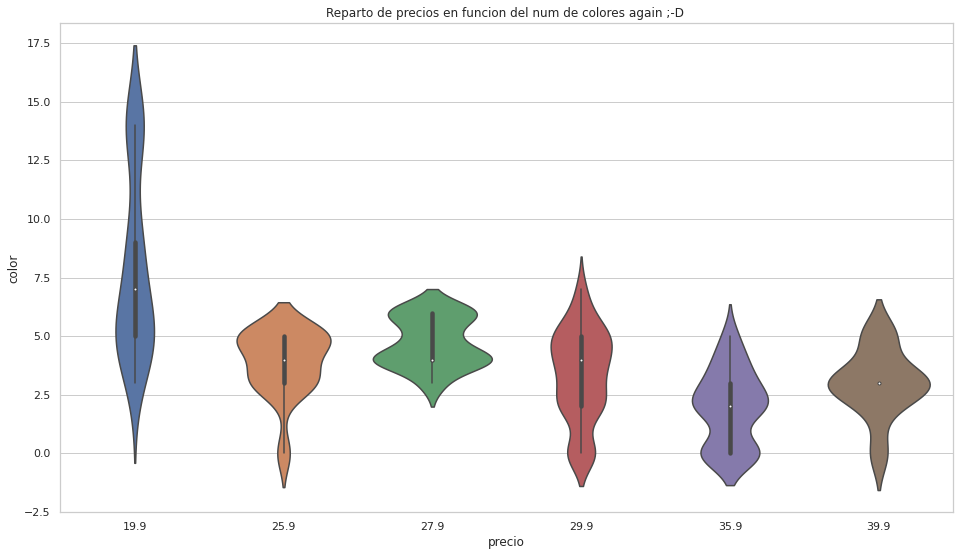

In [116]:
sns.violinplot(x="precio", y="color", data=df)
plt.title('Reparto de precios en funcion del num de colores again ;-D ')
plt.savefig('fig8.png', dpi = 300)

In [117]:
min(df.precio)

19.9

In [118]:
max(df.precio)

39.9

In [138]:
(df.precio).mean()

29.440106951871655

In [120]:
df['photo']

'https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dw000d9b8d/images/RP50L2044-M.jpg?sw=400&sfrm=jpeg'

In [143]:
baratos = df.loc[df.loc[:, 'precio'] == 19.9]

In [144]:
len(baratos)

58

In [134]:
baratos['photo'].iloc[0]

'https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dwa7b714cd/images/RIS65T_wear_019_M.jpg?sw=400&sfrm=png'

In [139]:
medios = df.loc[df.loc[:, 'precio'] == 29.9]

In [145]:
len(medios)

166

In [140]:
caros = df.loc[df.loc[:, 'precio'] == 39.9]

In [148]:
len(caros)

19

In [150]:
for i in range(3):
    f = open(f"b{i}.jpg",'wb')
    f.write(urllib.request.urlopen(baratos['photo'].iloc[i]).read())
    f.close()
    print(f"download successful  {baratos['photo'].iloc[i]}")

download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dwa7b714cd/images/RIS65T_wear_019_M.jpg?sw=400&sfrm=png
download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dwab70aeec/images/RIS65T_wear_044_M.jpg?sw=400&sfrm=png
download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dw8cab49f3/images/RSD65M_wear_019_M.jpg?sw=400&sfrm=png


In [151]:
for i in range(3):
    f = open(f"m{i}.jpg",'wb')
    f.write(urllib.request.urlopen(medios['photo'].iloc[i]).read())
    f.close()
    print(f"download successful  {medios['photo'].iloc[i]}")

download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dwd28b7974/images/RID96L019-M.jpg?sw=400&sfrm=jpeg
download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dw3b5097d3/images/RSD2443019-M.jpg?sw=400&sfrm=jpeg
download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dw0bc7c6f8/images/RBD2443019-M.jpg?sw=400&sfrm=jpeg


In [153]:
for i in range(3):
    f = open(f"c{i}.jpg",'wb')
    f.write(urllib.request.urlopen(caros['photo'].iloc[i]).read())
    f.close()
    print(f"download successful  {caros['photo'].iloc[i]}")

download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dwe0eb4850/images/RI1294S735I-M.jpg?sw=400&sfrm=jpeg
download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dw932ccadf/images/RI1294S019-M.jpg?sw=400&sfrm=jpeg
download successful  https://www.intimissimi.com/dw/image/v2/BHHR_PRD/on/demandware.static/-/Sites-INT_EC_COM/default/dw0a6eeaec/images/RID1407019-M.jpg?sw=400&sfrm=jpeg


In [122]:
f = open('min.jpg','wb')
f.write(urllib.request.urlopen(df['photo'].min()).read())
f.close()
print("download successful")

download successful


In [123]:
f = open('min.jpg','wb')
f.write(urllib.request.urlopen(df['photo'].max()).read())
f.close()
print("download successful")

download successful
